In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statistics import mean, stdev, median

In [26]:
prefix = '../../experiments/bc/1-neurons32-steps10-seedß/steps10#neurons32#seedß.csv'
title = 'BC_10epochs_32neurons'

runs = []
runs.append(pd.read_csv(prefix.replace('ß', '5')))
runs.append(pd.read_csv(prefix.replace('ß', '6')))
runs.append(pd.read_csv(prefix.replace('ß', '7')))
runs.append(pd.read_csv(prefix.replace('ß', '8')))
runs.append(pd.read_csv(prefix.replace('ß', '9')))



perf_sum = runs[0]["performance"]
idx = 0
for run in runs:
    if idx != 0:
        perf_sum + run["performance"]
    run["mean_distance"] = 0
    for i in range(0, len(run["distances"])):
        # hacky way to convert strings that represent list back to true lists of floats
        run["distances"][i] = list(map(float, run["distances"][i].replace('[', '').replace(']','').split(',')))
        run["mean_distance"][i] = mean(run["distances"][i])
    
    # # filter out extreme outliers
    # runs[idx] = run[run["mean_distance"] < 600]
    idx += 1

mean_perfs = perf_sum / len(runs)
tmp = runs[0]["mean_distance"]
[tmp := tmp + x["mean_distance"] for x in runs[1:]]
mean_dists = tmp / len(runs)


/tmp/ipykernel_6448/1601211557.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run["distances"][i] = list(map(float, run["distances"][i].replace('[', '').replace(']','').split(',')))
/tmp/ipykernel_6448/1601211557.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run["mean_distance"][i] = mean(run["distances"][i])


8397

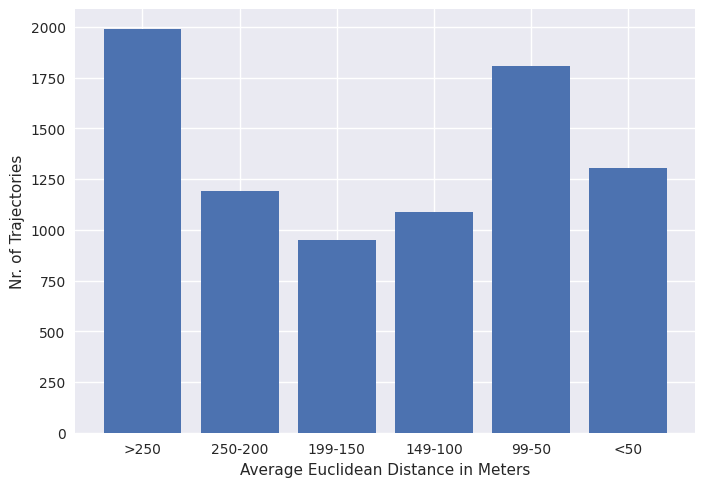

In [28]:
labels = ['>250','250-200', '199-150', '149-100','99-50','<50']
n_trajs = []
n_trajs.append(len(mean_dists[mean_dists > 250]))
n_trajs.append(len(mean_dists[(mean_dists >= 200) & (mean_dists <= 250)]))
n_trajs.append(len(mean_dists[(mean_dists >= 150) & (mean_dists <= 199)]))
n_trajs.append(len(mean_dists[(mean_dists >= 100) & (mean_dists <= 149)]))
n_trajs.append(len(mean_dists[(mean_dists >= 50) & (mean_dists <= 99)]))
n_trajs.append(len(mean_dists[mean_dists < 50]))

plt.style.use('seaborn')
plt.bar(labels,n_trajs)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Times'
plt.ylabel("Nr. of Trajectories")
plt.xlabel("Average Euclidean Distance in Meters")
len(runs[0])

In [32]:
print(mean(mean_dists))
print(stdev(mean_dists))
print(median(mean_dists))

178.04606407050136
147.96060081270227
147.6


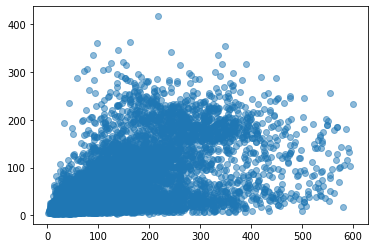

In [124]:
a = runs[0][(runs[0]["mean_distance"] < 150) & (runs[0]["ep_length"] < 150)]
plt.scatter(runs[0]["mean_distance"], runs[0]["ep_length"], alpha=0.5)
plt.show()

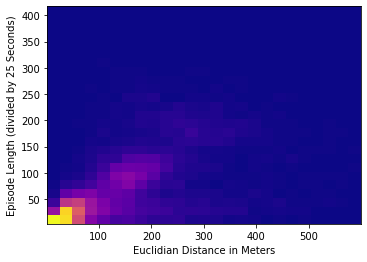

In [128]:
heatmap, xedges, yedges = np.histogram2d(runs[0]["mean_distance"], runs[0]["ep_length"],bins=25, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]


plt.imshow(heatmap.T, extent=extent, origin='lower', cmap="plasma")
plt.xlabel("Euclidian Distance in Meters")
plt.ylabel("Episode Length (divided by 25 Seconds)")
plt.show()